In [ ]:
import matplotlib.pyplot as plt
import math
#funcion
#y1(3,t)= 1,50 cos(0,462*3-157t+0,00)
def y1(t, x=3):
  return 1.50 * math.cos(0.462*x -157*t + 0)
#y2(3,t)= 1,50 cos(0,556*3-188t+pi/4)
def y2(t, x=3):
  desfase = math.pi/4
  return 1.50 * math.cos(0.556*x -188*t + desfase)

t_valores = []
i = 0.0001
while i <= 1.0000:
  i = round(i,4)
  t_valores.append(i)
  i += 0.0001

def formato_tres_cifras_significativas(valor,pos):
  texto = str(valor)
  texto = texto.split(".")
  if(valor == 0.000):
    return "0,00"
  if(texto[0].find('-') == 0):
    texto[0] = texto[0].replace("-","")
    if(texto[0] == '0' and len(texto) == 1):
      word = f"{valor:.3f}"
      word = word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word
  else:
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word = word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word

y1_valores = [y1(t) for t in t_valores]
y2_valores = [y2(t) for t in t_valores]

Text(0, 0.5, 'función de onda (m)')

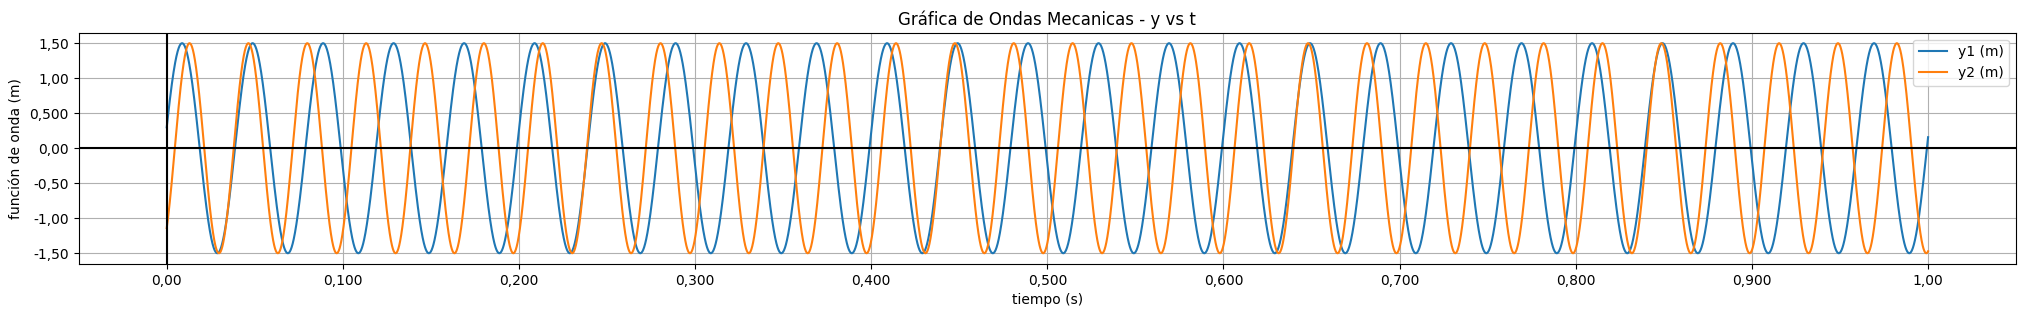

In [ ]:
ticks= []
ind = 0.000
while ind <= 1.000:
  ind = round(ind,3)
  ticks.append(ind)
  ind += 0.100
plt.figure(figsize = (25,3))
plt.grid(True)
plt.plot(t_valores,y1_valores,label = "y1 (m)")
plt.plot(t_valores,y2_valores,label = "y2 (m)")
plt.title("Gráfica de Ondas Mecanicas - y vs t")
plt.legend(loc=1)
plt.axhline(0,color = "black")
plt.axvline(0,color = "black")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")


[0.131, 0.332, 0.533, 0.734, 0.935]


Text(0, 0.5, 'función de onda (m)')

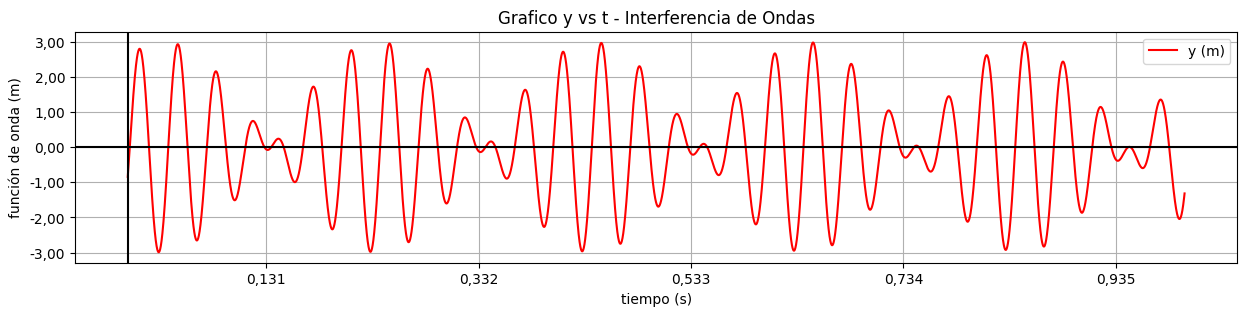

In [ ]:
#INTERFERENCIA DE ONDAS
#y(x,t) = y1(x,t) + y2(x,t)
#y(3,t) = y1(3,t) + y2(3,t)
#y(3,t) = 1,50 cos(0,462*3- 157t+0,00) + 1,50 cos(0,556*3-188t+pi/4)

def y(t, x = 3):
  desfase_y2 = math.pi/4
  return (1.50 * math.cos(0.462*x -157*t + 0)) + (1.50 * math.cos(0.556*x -188*t + desfase_y2))

y_valores = [y(t) for t in t_valores]
ticks_con_pulso = []
val = 0.131
while val <= 1.000:
  val = round(val,3)
  ticks_con_pulso.append(val)
  val += 0.201
print(ticks_con_pulso)
plt.figure(figsize = (15,3))
plt.grid(True)
plt.plot(t_valores,y_valores, color ="red",label = "y (m)")
plt.title("Grafico y vs t - Interferencia de Ondas")
plt.xticks(ticks_con_pulso)
plt.axhline(0,color = "black")
plt.axvline(0,color = "black")
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")
